In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [23]:
torch.manual_seed(42)

# Define a simple feedforward neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, num_classes=10):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
      x = x.view(-1, 28 * 28)  # Flatten the input tensor
      x = torch.relu(self.fc1(x))
      x = torch.relu(self.fc2(x))
      return x


In [24]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [18]:
print(train_dataset.data.size())

torch.Size([60000, 28, 28])


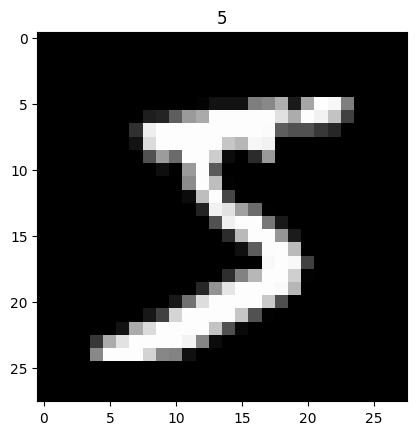

In [25]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('%i' % train_dataset.targets[0])
plt.show()

In [39]:
optimizers = {
    'SGD': optim.SGD,
    'SGD_momentum': lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9),
    'Adam': optim.Adam,
    'Adagrad': optim.Adagrad,
    'RMSprop': optim.RMSprop
}



In [40]:
def train(model, optimizer_name, lr, epochs):
   optimizer = optimizers[optimizer_name](model.parameters(), lr=lr)

   criterion = nn.CrossEntropyLoss()


   for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        accuracy = 100.0 * correct / len(test_loader.dataset)
        print(f'Epoch: {epoch+1}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')


In [28]:
model = NeuralNet()
optimizer_name = 'SGD'
lr = 0.01
epochs = 10

train(model, optimizer_name, lr, epochs)

Epoch: 1, Test Loss: 0.0098, Accuracy: 81.04%
Epoch: 2, Test Loss: 0.0086, Accuracy: 82.59%
Epoch: 3, Test Loss: 0.0081, Accuracy: 83.29%
Epoch: 4, Test Loss: 0.0077, Accuracy: 83.82%
Epoch: 5, Test Loss: 0.0076, Accuracy: 83.93%
Epoch: 6, Test Loss: 0.0073, Accuracy: 84.33%
Epoch: 7, Test Loss: 0.0072, Accuracy: 84.53%
Epoch: 8, Test Loss: 0.0042, Accuracy: 93.29%
Epoch: 9, Test Loss: 0.0035, Accuracy: 93.68%
Epoch: 10, Test Loss: 0.0035, Accuracy: 93.79%


In [35]:
model = NeuralNet()
optimizer_name = 'Adam'
lr = 0.01
epochs = 10

train(model, optimizer_name, lr, epochs)

Epoch: 1, Test Loss: 0.0268, Accuracy: 28.97%
Epoch: 2, Test Loss: 0.0268, Accuracy: 29.32%
Epoch: 3, Test Loss: 0.0266, Accuracy: 28.94%
Epoch: 4, Test Loss: 0.0264, Accuracy: 29.19%
Epoch: 5, Test Loss: 0.0266, Accuracy: 28.80%
Epoch: 6, Test Loss: 0.0264, Accuracy: 29.03%
Epoch: 7, Test Loss: 0.0240, Accuracy: 37.08%
Epoch: 8, Test Loss: 0.0234, Accuracy: 37.76%
Epoch: 9, Test Loss: 0.0234, Accuracy: 38.35%
Epoch: 10, Test Loss: 0.0237, Accuracy: 37.78%


In [36]:
model = NeuralNet()
optimizer_name = 'Adagrad'
lr = 0.01
epochs = 10

train(model, optimizer_name, lr, epochs)

Epoch: 1, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 2, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 3, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 4, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 5, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 6, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 7, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 8, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 9, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 10, Test Loss: 0.0362, Accuracy: 9.80%


In [37]:
model = NeuralNet()
optimizer_name = 'RMSprop'
lr = 0.01
epochs = 10

train(model, optimizer_name, lr, epochs)

Epoch: 1, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 2, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 3, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 4, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 5, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 6, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 7, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 8, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 9, Test Loss: 0.0362, Accuracy: 9.80%
Epoch: 10, Test Loss: 0.0362, Accuracy: 9.80%


In [41]:
model = NeuralNet()
optimizer_name = 'SGD_momentum'
lr = 0.01
epochs = 10

train(model, optimizer_name, lr, epochs)

Epoch: 1, Test Loss: 0.0033, Accuracy: 94.12%
Epoch: 2, Test Loss: 0.0026, Accuracy: 95.09%
Epoch: 3, Test Loss: 0.0019, Accuracy: 96.46%
Epoch: 4, Test Loss: 0.0018, Accuracy: 96.19%
Epoch: 5, Test Loss: 0.0015, Accuracy: 97.07%
Epoch: 6, Test Loss: 0.0015, Accuracy: 96.99%
Epoch: 7, Test Loss: 0.0013, Accuracy: 97.45%
Epoch: 8, Test Loss: 0.0013, Accuracy: 97.37%
Epoch: 9, Test Loss: 0.0013, Accuracy: 97.60%
Epoch: 10, Test Loss: 0.0013, Accuracy: 97.63%
